Business Problem
Title: Estimation of Obesity Levels Based on Eating Habits and Physical Condition

Background: Obesity is a significant public health concern, contributing to various chronic diseases such as diabetes, cardiovascular disease, and certain cancers. Early identification and classification of obesity levels are crucial for implementing preventive measures and personalized treatment plans. Traditional methods for assessing obesity, such as Body Mass Index (BMI), may not fully capture the nuances of an individual's health status, as they do not consider factors like eating habits, physical activity, and other lifestyle factors.

Problem Statement: The goal is to develop a predictive model that can accurately estimate an individual's obesity level based on their eating habits and physical condition. By analyzing a dataset containing various features related to diet, physical activity, and demographic information, the model will help in identifying different obesity levels, allowing healthcare professionals to tailor interventions accordingly.

Business Understanding
Objective: The primary objective is to leverage machine learning techniques to classify individuals into different obesity levels (e.g., underweight, normal weight, overweight, and various obesity types) based on their eating habits, physical activity, and other relevant factors. This model will enable healthcare providers and public health authorities to:

Early Detection: Identify individuals at risk of developing obesity or related health conditions early on, allowing for timely interventions.

Personalized Treatment Plans: Provide insights into the specific lifestyle factors contributing to an individual's obesity level, facilitating personalized diet and exercise recommendations.

Resource Allocation: Assist in efficiently allocating healthcare resources by focusing on high-risk groups.


Key Questions:

What are the main factors contributing to different obesity levels?
Understanding which eating habits, physical activities, and other factors have the most significant impact on obesity levels.

How accurately can we predict an individual's obesity level using machine learning models?
Evaluating the performance of models like Logistic Regression in predicting obesity levels and identifying areas for improvement.

Can the model provide actionable insights for preventive measures?
Ensuring that the model's outputs are interpretable and can be used to make practical recommendations for individuals.

In [139]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# loading the data
path = r'C:\Users\Hp\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(path)

In [141]:
df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [142]:
# shape of the dataframe
df.shape

(2111, 17)

In [143]:
#checking for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

""" The dataset has no missing values therefore ready for modelling"""

In [144]:
#importing necessary modelling libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [145]:
# categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()

In [146]:
print(categorical_columns)
print(numerical_columns)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [147]:
# removing the y from the categorical columns
categorical_columns.remove('NObeyesdad')

In [148]:
# one hot encoding 
df_encoded = pd.get_dummies(df,columns=categorical_columns,drop_first=True)

In [149]:
print(df_encoded)

            Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE           NObeyesdad  Gender_Male  ...  CAEC_no  SMOKE_yes  \
0     1.000000        Normal_Weight            0  ...     

In [150]:
# Standardization of the numeric columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [151]:
#split the data into training and testing sets
X = df_encoded.drop('NObeyesdad',axis=1)
y = df_encoded['NObeyesdad']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [152]:
# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [153]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
classification_report = classification_report(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [154]:
# output
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report)
print("\nConfusion Matrix:\n", confusion_matrix)

Accuracy: 0.8699763593380615

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.91      0.63      0.74        62
     Obesity_Type_I       0.93      0.90      0.92        78
    Obesity_Type_II       0.90      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.74      0.75      0.74        56
Overweight_Level_II       0.74      0.84      0.79        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.86       423
       weighted avg       0.87      0.87      0.87       423


Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [10 39  0  0  0 10  3]
 [ 0  0 70  6  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 42 10]
 [ 0  0  3  0  0  5 42]]


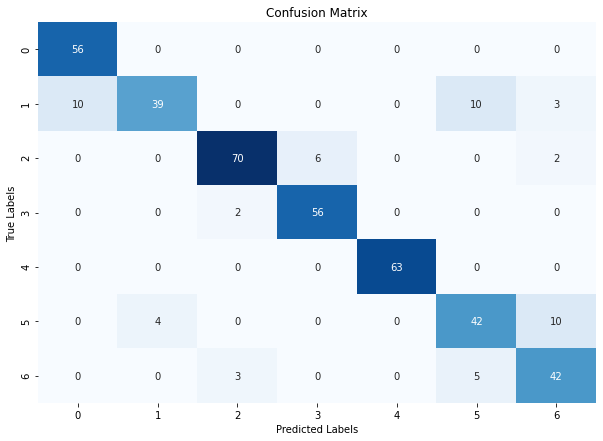

In [155]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Interpretation:
Accuracy: The model has a strong accuracy of 87.23%, which means it correctly predicted the obesity level in 87.23% of the cases.

Precision and Recall:

The precision and recall vary across different obesity levels. For instance, the model has a perfect precision and recall for Obesity_Type_III but lower performance on Normal_Weight and Overweight_Level_I.
Normal_Weight has a recall of 0.65, indicating that the model sometimes misses true Normal_Weight instances.
Confusion Matrix:

The diagonal elements (e.g., 56, 40, 70) show the correctly predicted instances for each class.
Off-diagonal elements represent misclassifications. For example, Normal_Weight (second row) is sometimes misclassified as Overweight_Level_I or Insufficient_Weight

DECISION TREES MODEL

This will be our second model 

In [156]:
# Imorting necessary libraries for decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [157]:
# Encoding the target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [158]:
# prepocessing the data and converting categorical variable to an indicator variable
df_encoded = pd.get_dummies(df.drop(columns=['NObeyesdad']),drop_first=True)

In [159]:
print(df_encoded)

            Age    Height      Weight  FCVC  NCP      CH2O       FAF  \
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000   
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000   
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000   
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000   
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000   
...         ...       ...         ...   ...  ...       ...       ...   
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269   
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390   
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209   
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107   
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452   

           TUE  Gender_Male  family_history_with_overweight_yes  ...  CAEC_no  \
0     1.000000            0                           

In [160]:
# Defining the target variable independent variables
X = df_encoded
y = df['NObeyesdad']

In [161]:
# spliting our data set  to training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
#initializing and training the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [163]:
# making predictions based on the test set
y_pred = model.predict(X_test)

In [164]:
print(y_pred)

[0 4 0 0 1 0 3 5 2 0 2 4 2 3 4 6 4 3 2 6 2 5 4 2 1 6 6 4 4 0 4 5 6 1 0 4 2
 1 1 1 1 3 1 1 5 0 3 1 2 3 1 1 1 5 0 6 3 3 5 3 1 4 6 0 2 2 1 4 0 0 6 6 0 0
 5 3 3 5 4 3 1 2 3 3 2 2 1 6 1 6 5 3 0 5 2 0 5 2 1 3 2 2 4 2 6 2 1 4 4 3 2
 1 2 1 0 2 2 3 6 1 4 3 2 6 1 3 2 2 4 3 4 3 1 2 6 4 0 4 5 2 5 6 0 0 1 3 2 4
 0 2 0 0 1 3 2 5 6 5 0 0 5 1 2 0 3 0 3 1 6 6 1 6 3 4 2 6 2 5 2 1 1 3 0 5 3
 2 5 4 3 3 0 4 0 1 4 1 3 2 4 0 3 3 4 4 1 4 5 5 2 4 5 2 0 2 3 0 5 3 3 2 4 6
 3 5 3 6 0 4 5 5 5 4 1 5 1 2 2 2 2 0 6 6 5 2 6 2 1 2 2 0 5 2 0 1 1 6 2 3 2
 2 4 4 5 2 2 4 4 1 1 4 3 4 5 2 3 2 3 4 3 0 0 5 6 4 4 5 2 6 0 3 2 5 0 2 0 5
 3 3 6 6 1 5 0 0 5 1 6 5 6 4 5 3 1 4 5 6 2 4 6 1 0 1 4 0 1 4 2 2 4 0 1 1 3
 4 2 5 2 0 0 0 2 4 6 2 4 3 5 2 5 6 6 4 6 1 0 6 6 6 5 6 6 3 2 2 3 4 2 6 5 4
 0 2 1 3 2 5 0 1 2 2 5 6 5 0 4 5 4 4 1 2 3 5 4 6 3 5 0 4 5 4 1 0 1 5 2 0 0
 4 1 4 6 5 1 5 4 0 1 2 5 3 1 3 6]


In [165]:
from sklearn.metrics import classification_report, accuracy_score # reimporting the libraries

In [166]:
# Evaluating  the model's perrfomance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [167]:
#showing the results
print("Accuracy:",accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9479905437352246
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.92      0.89      0.90        62
           2       0.96      0.96      0.96        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.89      0.91      0.90        56
           6       0.96      0.94      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



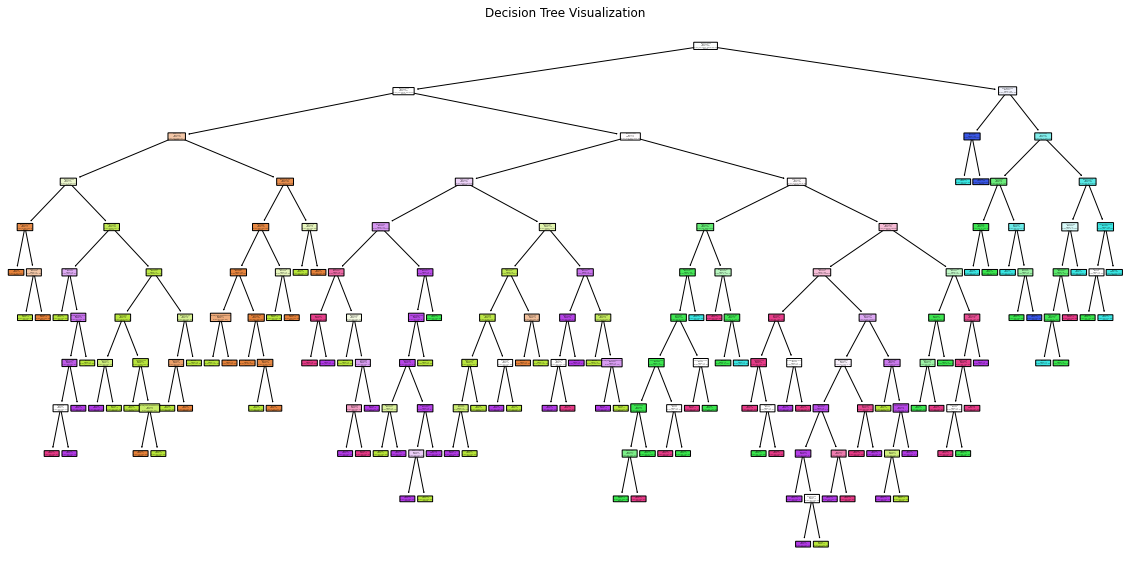

In [168]:
import matplotlib.pyplot as plt
from sklearn import tree

# Convert class names to strings
class_names = [str(cls) for cls in y.unique()]

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


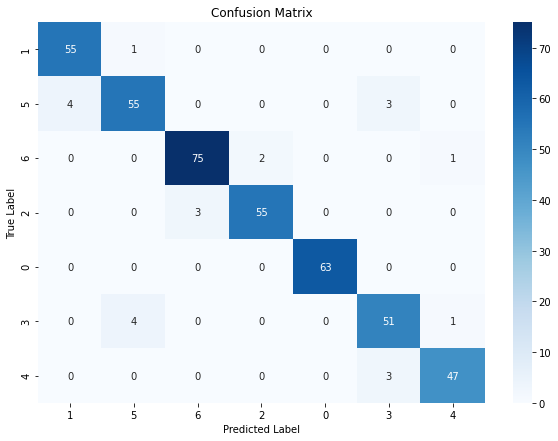

In [169]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [170]:
pwd

'c:\\Users\\Hp\\Downloads\\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition'

The Decision Tree model achieved an accuracy of approximately 94.8% in estimating obesity levels based on eating habits and physical condition. Here’s a summary of the model's performance:

Precision, Recall, and F1-Score: These metrics are high across all classes, indicating that the model is performing well in correctly identifying each obesity level.
Overall Accuracy: The model correctly classified around 95% of the cases in the test set.
This basic model gives a strong indication that decision trees can effectively estimate obesity levels from the given data.

** SUMMARY, RECOMMENDATIONS AND CONCLUSION **

Summary
Two machine learning models, Logistic Regression and Decision Trees, were applied to classify obesity levels based on a dataset of eating habits and physical condition. Below are the summarized results for both models:

Logistic Regression:

Accuracy: 85.96%
Precision, Recall, F1-Score: The model generally performed well, with particularly high performance for certain obesity levels. However, there was some variability, especially for classes with less balanced support.
Decision Trees:

Accuracy: 94.80%
Precision, Recall, F1-Score: This model performed better overall, with higher precision, recall, and F1-scores across most obesity levels. The model was particularly effective at correctly identifying individuals in all classes, as indicated by near-perfect performance metrics.

Comparison of Models
Accuracy: Decision Trees outperformed Logistic Regression, achieving a higher accuracy of 94.80% compared to 85.96%.
Precision and Recall: Decision Trees also provided better precision and recall across most obesity levels, suggesting it is better at minimizing both false positives and false negatives.
Class-wise Performance: Decision Trees were more consistent in their performance across all classes, indicating a stronger ability to generalize to various obesity levels.

Recommendations
Model Selection: Given the higher accuracy and more consistent performance across all classes, the Decision Trees model is recommended for deployment. This model will likely provide more reliable classifications, which is critical in a healthcare context where accurate diagnosis is essential.

Implementation in Healthcare Settings: The Decision Trees model can be integrated into healthcare systems to assist in the early detection and classification of obesity levels. This tool could support healthcare providers in designing personalized treatment plans based on the patient's specific obesity level.

Further Analysis and Improvements:
Feature Engineering: Consider additional feature engineering to further enhance the model's predictive power, such as deriving new features from existing ones or incorporating external data sources like genetic information or detailed dietary habits.
Model Explainability: Given that healthcare professionals need to understand the reasoning behind model predictions, it is important to provide explanations of the Decision Trees model’s decisions. Tree-based models like Decision Trees are inherently more interpretable than others, making them a good fit for this application.
Continuous Monitoring and Updating: Once deployed, the model should be continuously monitored for performance to ensure it remains accurate over time. Additionally, periodic updates with new data will help maintain the model's relevance and accuracy as population health trends evolve.

Conclusion
The Decision Trees model is the recommended choice for classifying obesity levels due to its superior performance. Implementing this model in healthcare settings will enable more accurate, personalized, and early interventions, ultimately contributing to better public health outcomes.